3D Data Processing

HW1: Harris Corner Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 
import numpy as np
import argparse
from google.colab.patches import cv2_imshow

/content/drive/MyDrive/3DDP23_HW1
 3DDP23_HW1_corner_detection.ipynb   building.jpg
'3DDP23_HW1_Corner Detection.pdf'
[640, 480, 3]


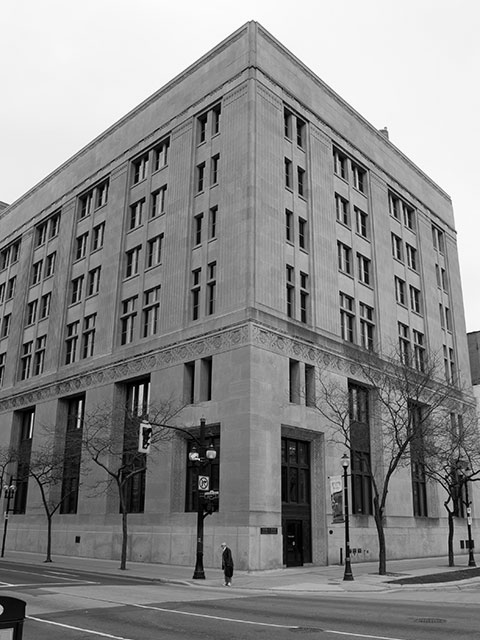

In [ ]:
%cd /content/drive/MyDrive/3DDP23_HW1

!ls

img = cv2.imread('building.jpg', 1)
h, w, ch = img.shape
print([h, w, ch])

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)



Global variable (Do not modify)

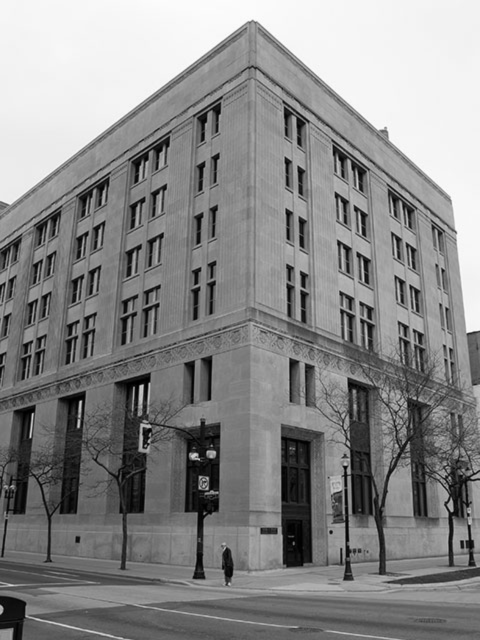

In [ ]:
# window size: 7x7
wsize = 7

# Apply Gaussian Blur
gray = cv2.GaussianBlur(gray, (0, 0), 0.5)
cv2_imshow(gray)


Get Harris Corner Map

HW1: cornerness 의 값을 나타내는 hmap 을 계산하여 반환하세요

hmap의 크기는 입력 image의 크기와 동일합니다.


In [25]:

def getCornerMap(gray, winsize, lamb):
    # 반환 np배열을 만듦
    H, W = gray.shape[:2]
    hmap = np.zeros((H, W))


    # 윈도우가 적용될 수 있는 범위를 지정하기 위해서 사용 
    # -> offset의 크기의 1/2만큼은 진행하지 않은 것이기 때문이다.
    offset = int(winsize/2)
    x_range = gray.shape[1] - offset
    y_range = gray.shape[0] - offset

    # 분석해야 하는 값 범위 확인 후 정의
    # x 축으로 비교할값, y축으로 비교할 값, 검사할 값
    dy, dx = np.gradient(gray)
    Ixx = dx**2
    Iyy = dy**2
    Ixy = dy*dx

    for y in range(offset, y_range):
        for x in range(offset, x_range):
            # 값을 검출하기 위한 offset 윈도우 크기의 범위 init -> for 문마다 갱신됨
            start_y = y - offset
            end_y = y + offset + 1
            start_x =  x - offset
            end_x = x + offset + 1

            # x, y의 비교할 값 전부다 넣어준 결과값을 생성함.
            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIxy = Ixy[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]

            # 부분 도함수의 강도 제곱의 합을 생성함.
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            # 행렬의 행렬식 및 자취 계산을 해서 결과값 도출 및 결론
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            hmap[y, x] = (det - lamb*(trace**2))

    return hmap



4842398643.3475


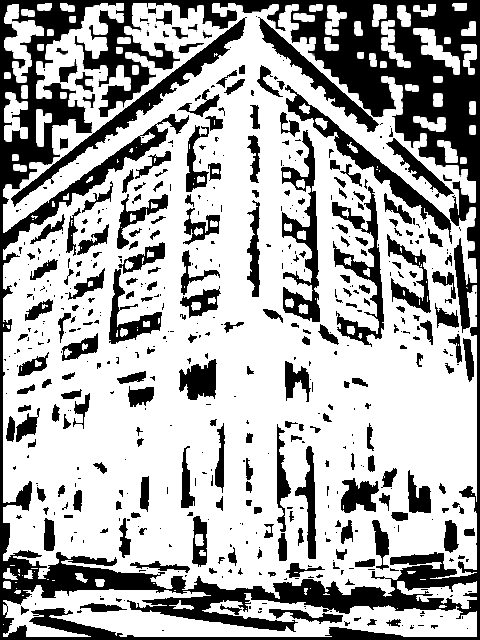

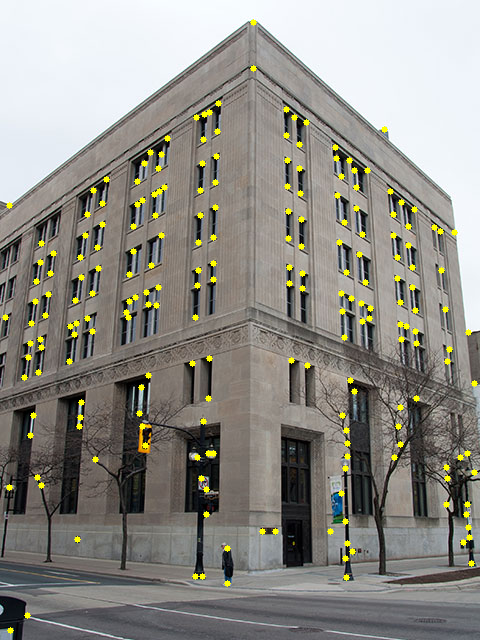

In [26]:
# hmap = cv2.cornerHarris(gray, 2 , 3, 0.04)
hmap = getCornerMap(gray, wsize, 0.04)
print(np.max(hmap))

cv2_imshow(hmap*512)

img_corner = img.copy()
nms = 5
max_corner = np.max(hmap)

for v in range(nms, h-nms):
  for u in range(nms, w-nms):
    if hmap[v,u] >= np.max(hmap[v-nms:v+nms, u-nms:u+nms]) and hmap[v,u] > 0.1 * max_corner:
      cv2.circle(img_corner, (u, v), 3, (0, 255, 255), -1)
      hmap[h-nms:h+nms, w-nms:w+nms] = 0

cv2_imshow(img_corner)